# Práctica Grupal: SQL Murder

A crime has taken place and the detective needs your help. The detective gave you the crime scene report, but you somehow lost it. You vaguely remember that the crime was a **murder** that occurred sometime on **Jan.15, 2018** and that it took place in **SQL City**. Start by retrieving the corresponding crime scene report from the police department’s database.



![Captura de Pantalla 2023-12-09 a las 6.37.39.png](<attachment:Captura de Pantalla 2023-12-09 a las 6.37.39.png>)
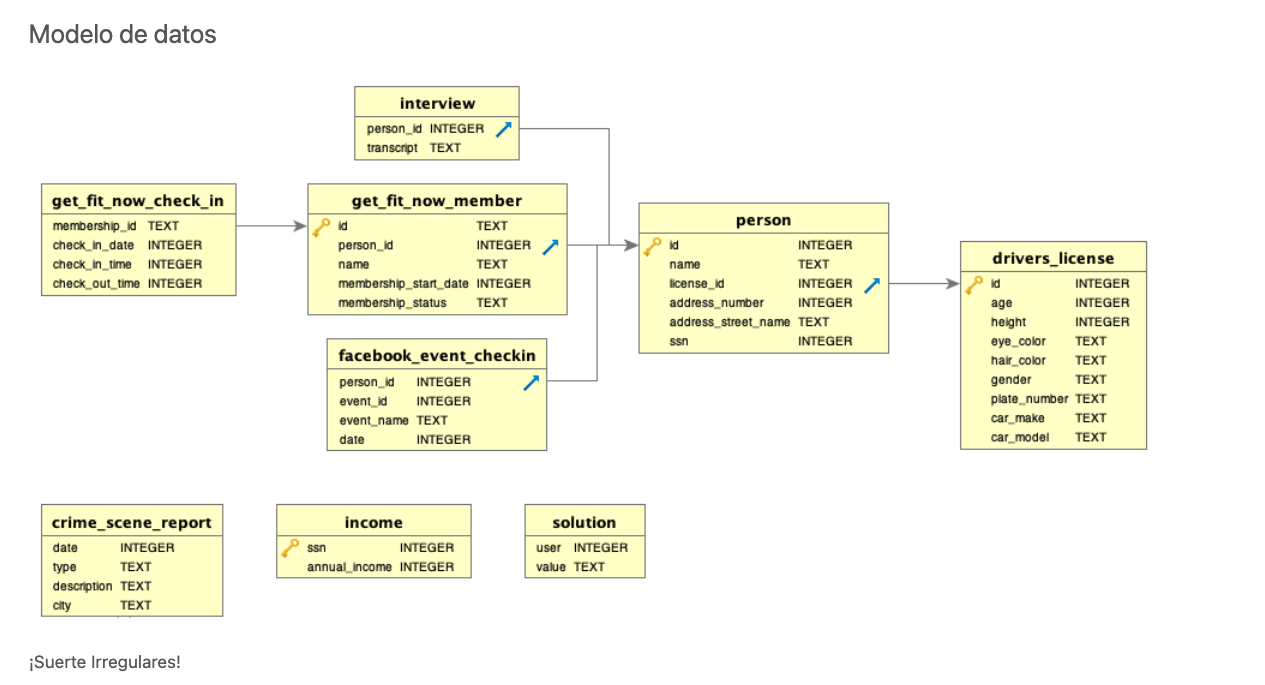

#### Primero buscamos los primeros datos sobre el delito:

```
SELECT *
  FROM crime_scene_report
  WHERE date=20180115 and  type="murder"
```

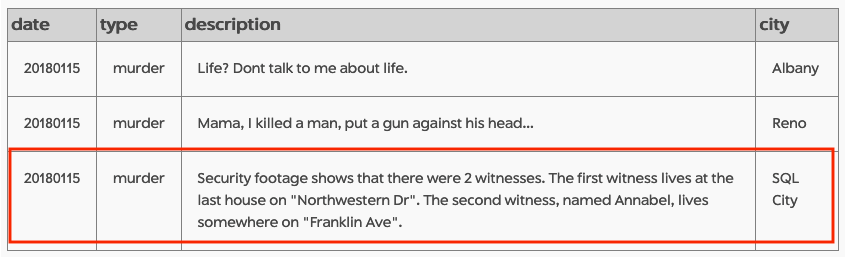

#### Investigamos en la dirección que nos dan en la declarción:

```
SELECT *
  FROM person
  WHERE address_street_name ="Northwestern Dr"
  ORDER BY  address_number DESC
```

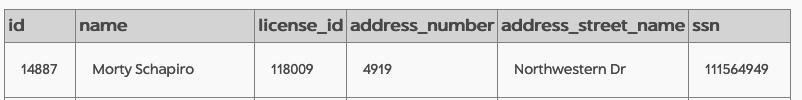

```
SELECT *
    FROM person
    WHERE address_street_name ="Franklin Ave"
    ORDER BY  name 
```

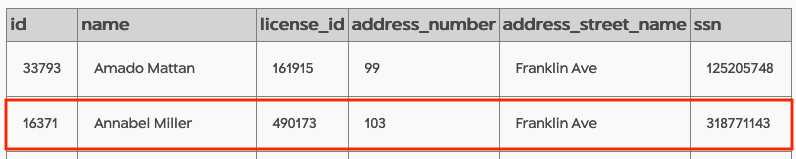

#### Con los datos de id de los sospechosos vamos a investigar a la tabla de interview

```
SELECT *
  FROM interview
  WHERE person_id=14887


SELECT *
  FROM interview
  WHERE person_id=16371
```

![Captura de Pantalla 2023-12-09 a las 6.53.14.png](<attachment:Captura de Pantalla 2023-12-09 a las 6.53.14.png>)
![Captura de Pantalla 2023-12-09 a las 6.53.23.png](<attachment:Captura de Pantalla 2023-12-09 a las 6.53.23.png>)

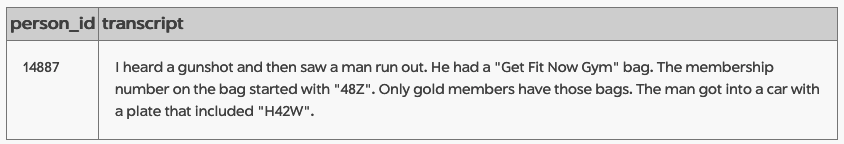
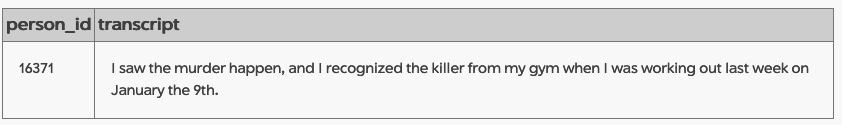

#### Con los datos obtenidos de los testigos seguimos investigando, acudimos a los datos de entrada de la tabla get_fit_now_check_in

```
SELECT *
  FROM get_fit_now_check_in
  WHERE check_in_date= 20180109 and membership_id LIKE '%48Z%'
```

![Captura de Pantalla 2023-12-09 a las 6.58.00.png](<attachment:Captura de Pantalla 2023-12-09 a las 6.58.00.png>)
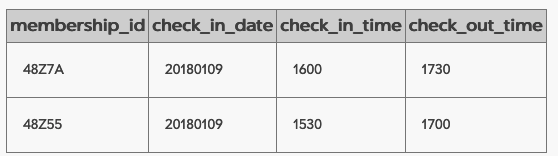

```
SELECT *
  FROM drivers_license
  WHERE plate_number LIKE '%H42W%'r"
```

![Captura de Pantalla 2023-12-09 a las 7.00.01.png](<attachment:Captura de Pantalla 2023-12-09 a las 7.00.01.png>)
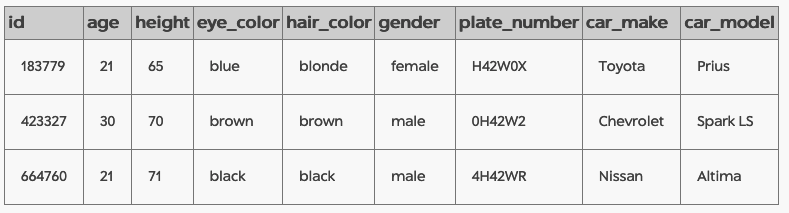

```
SELECT *
  FROM person
  WHERE license_id = 183779 or license_id = 423327 or license_id = 664760
```

![Captura de Pantalla 2023-12-09 a las 7.03.50.png](<attachment:Captura de Pantalla 2023-12-09 a las 7.03.50.png>)
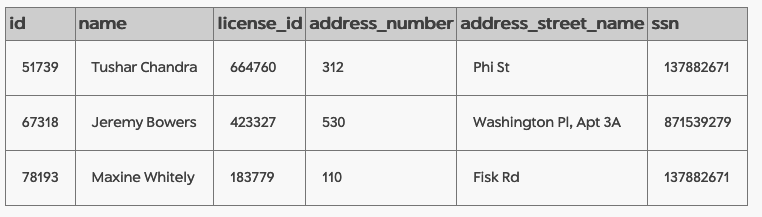

#### Con estos datos investigamos suscripciones en el gimnasio de los sospechosos:

```
SELECT *
  FROM get_fit_now_member
  WHERE name="Maxine Whitely" or name="Tushar Chandra" or name="Jeremy Bowers"
```

![Captura de Pantalla 2023-12-09 a las 7.04.53.png](<attachment:Captura de Pantalla 2023-12-09 a las 7.04.53.png>)
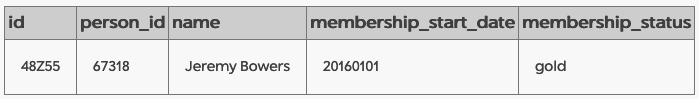

Encontramos un sejeto que concuerda 100%

![Captura de Pantalla 2023-12-09 a las 7.07.07.png](<attachment:Captura de Pantalla 2023-12-09 a las 7.07.07.png>)
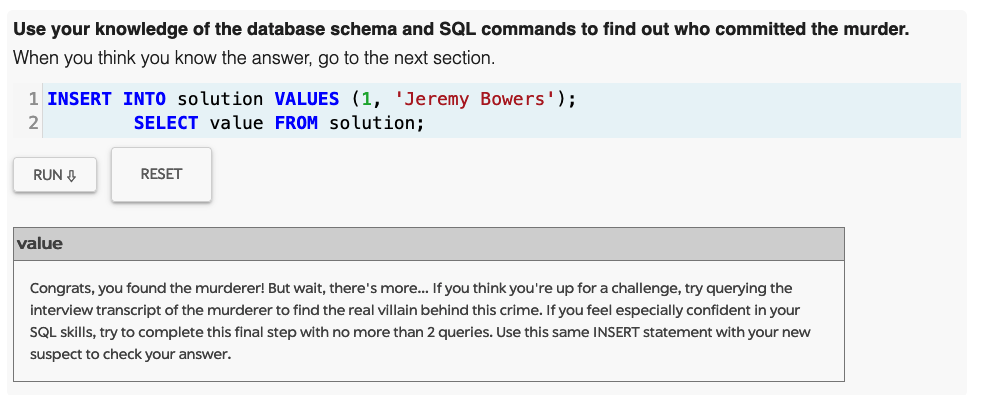

### Ahora seguimos investigando con los datos del primer caso

```
SELECT *
  FROM interview
  WHERE person_id=67318
```

![Captura de Pantalla 2023-12-09 a las 7.11.23.png](<attachment:Captura de Pantalla 2023-12-09 a las 7.11.23.png>)
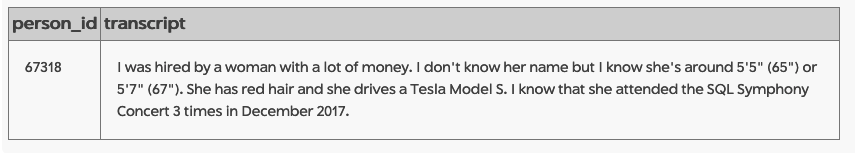

#### Creamos una consulta que agrupe todos los datos que tenemos

```
SELECT A.*, subgrupo.*
  FROM drivers_license as A
  INNER JOIN (
    SELECT A.*, B.*
FROM (
    SELECT person_id
    FROM facebook_event_checkin
  	WHERE date >=20171201 and date <20171231 and event_name LIKE '%Symphony%'
  	GROUP BY person_id
  	HAVING COUNT(person_id) = 3
) AS A
INNER JOIN person AS B ON A.person_id = B.id
  ) as subgrupo
  ON A.id=subgrupo.license_id
```

![Captura de Pantalla 2023-12-09 a las 8.01.14.png](<attachment:Captura de Pantalla 2023-12-09 a las 8.01.14.png>)
![Captura de Pantalla 2023-12-09 a las 8.01.06.png](<attachment:Captura de Pantalla 2023-12-09 a las 8.01.06.png>)

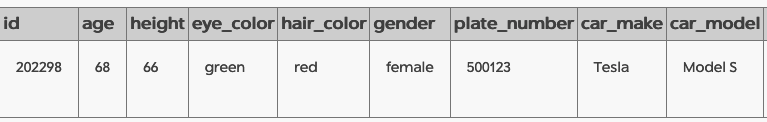
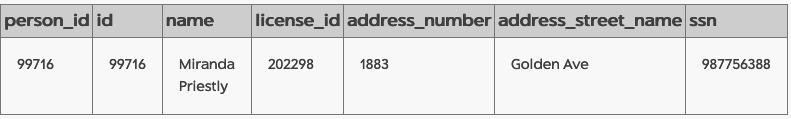

![Captura de Pantalla 2023-12-09 a las 8.03.20.png](<attachment:Captura de Pantalla 2023-12-09 a las 8.03.20.png>)
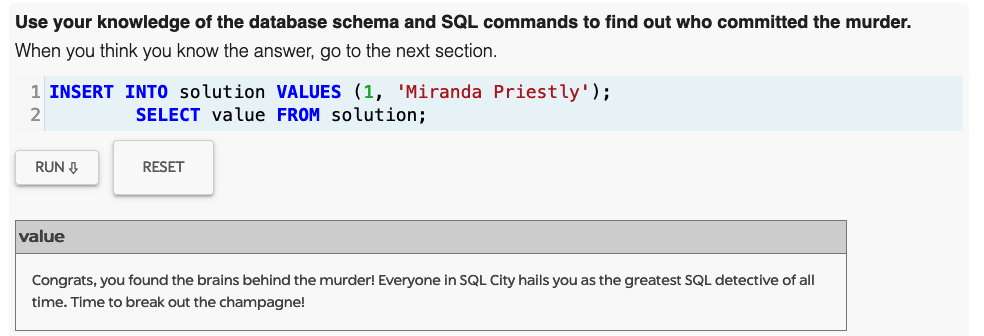